In [17]:
from keras.datasets import mnist
import cv2
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import models
from keras.models import Sequential
from keras import layers

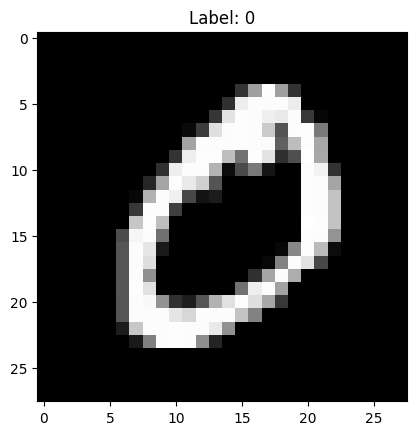

In [18]:
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


plt.imshow(train_images[1], cmap='gray')
plt.title(f'Label: {train_labels[1]}')
plt.show()


In [19]:
train_labels[1]

0

In [20]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [21]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [24]:
network.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2640 - accuracy: 0.9235
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1087 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0721 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0523 - accuracy: 0.9842
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0388 - accuracy: 0.9887


In [26]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0645 - accuracy: 0.9799


In [27]:
tst = 255 - cv2.imread('digit_4.png', 0)
tst = cv2.resize(tst,(28, 28))
# plt.imshow(tst, cmap='gray')
# plt.title(f'Label: {tst}')
# plt.show()

tst = tst.reshape((1, 28 * 28))
tst = tst.astype('float32') / 255

In [28]:
pred=list(network.predict(tst)[0])
pred.index(max(pred))

1/1 [==============================] - 0s 115ms/step


4

**Conclusion:**

During the project, the model demonstrated good accuracy on test data, but additional improvements may be needed to enhance accuracy in recognizing self-hand-drawn numbers. Possible directions for further research include improving data preprocessing and fine-tuning model parameters.
